# Project Number 9

In [3]:
#This is 'SBI Insurance Claim Prediction Dataset' which based on medical cost personal dataset. 
# sex attribute : Male->1,Female->0
# smoker attribute: non smoker ->0, smoker->1
# region attribute : northeast->0,northwest->1,southeast->3,southwest->4
# InsuranceClaim attribute (Target): yes->1,no->0

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('sbi.csv')

In [6]:
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# EDA

In [7]:
df=pd.DataFrame(data=data)
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [8]:
df.info()
# No missing values in the dataset
# No object datatype present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [9]:
df.skew()
# skewness observed in 'smoker' column. BUT its a binary data column,so no need to fix the skewness
# Skewness observed in 'children' column. BUT no need to fix this skewness
# skewness observed in 'charges' column. need to fix this.later we will do standard scaling. 

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

# Univariate Analysis

In [10]:
c={'boxes':'Red','whiskers':'Blue','medians':'Green','caps':'Grey'}
# fixing the color for boxplot

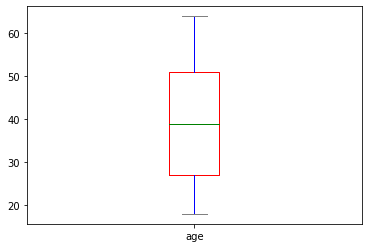

In [11]:
df['age'].plot.box(color=c)
#no outliers present

{'bodies': [<matplotlib.collections.PolyCollection at 0x1864987c9c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x186490d65c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1864988bc48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1864988bbc8>}

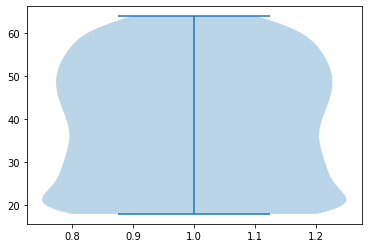

In [12]:
plt.violinplot(df['age'])
# dataset contains all age group people

{'bodies': [<matplotlib.collections.PolyCollection at 0x186498f95c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x186498ee648>,
 'cmins': <matplotlib.collections.LineCollection at 0x186498f9e08>,
 'cbars': <matplotlib.collections.LineCollection at 0x18649901cc8>}

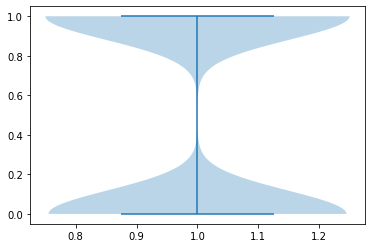

In [13]:
plt.violinplot(df['sex'])
# Binary column

{'bodies': [<matplotlib.collections.PolyCollection at 0x1864996c348>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1864995f388>,
 'cmins': <matplotlib.collections.LineCollection at 0x1864996cb88>,
 'cbars': <matplotlib.collections.LineCollection at 0x18649971a48>}

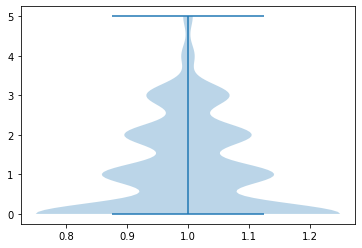

In [14]:
plt.violinplot(df['children'])
# Checking the frequncy of number of kids. in this dataset most of the families are children less

{'bodies': [<matplotlib.collections.PolyCollection at 0x186499d3988>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x186499c79c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x186499da9c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x186499da948>}

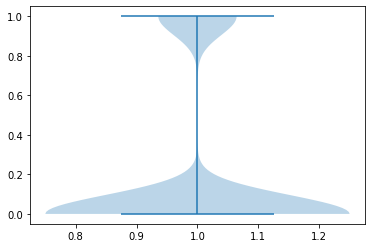

In [15]:
plt.violinplot(df['smoker'])
#binary column

{'bodies': [<matplotlib.collections.PolyCollection at 0x18649a42208>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x18649a34188>,
 'cmins': <matplotlib.collections.LineCollection at 0x18649a42a48>,
 'cbars': <matplotlib.collections.LineCollection at 0x18649a47908>}

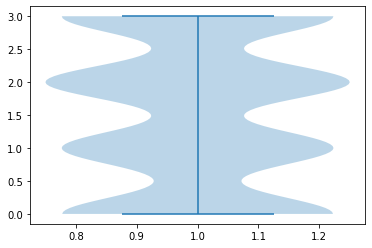

In [16]:
plt.violinplot(df['region'])
# dataset contains canddates from all four given locations

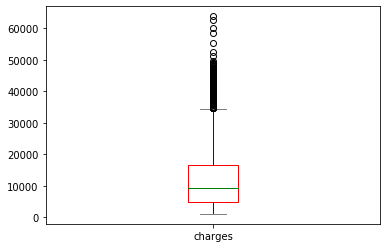

In [17]:
df['charges'].plot.box(color=c)
#outliers present here

# Bivariate Analysis

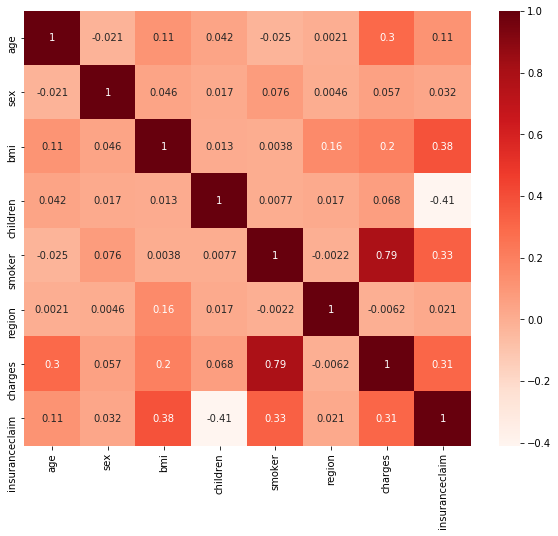

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Reds',annot=True)
# Checking co-relation between all the attributes.
# apart from 'children' column, most of the attributes are sharing positive corelation with 'insuracnce claim(target variable)'

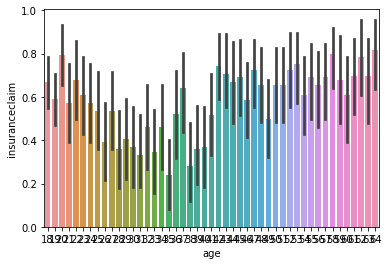

In [19]:
sns.barplot(x='age',y='insuranceclaim',data=df)


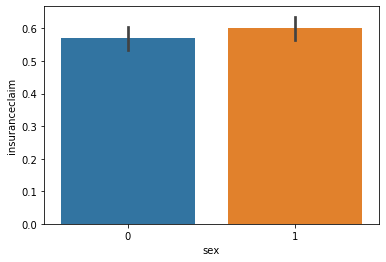

In [20]:
sns.barplot(x='sex',y='insuranceclaim',data=df)
# checking insurance claimed by different sex people. Male cnadidates seem to claim moe insuarnce

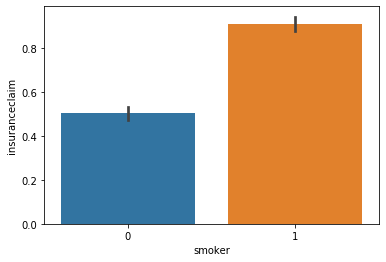

In [21]:
sns.barplot(x='smoker',y='insuranceclaim',data=df)
# smokers are more keen to claim insurance money

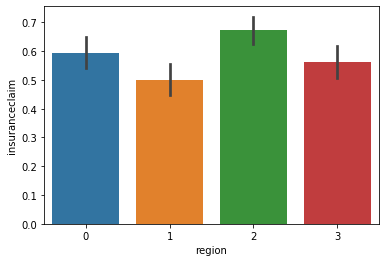

In [22]:
sns.barplot(x='region',y='insuranceclaim',data=df)

In [23]:
df.describe()
# 'charges' columns seems to contain outliers since difference between max and 75% value is quite high

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


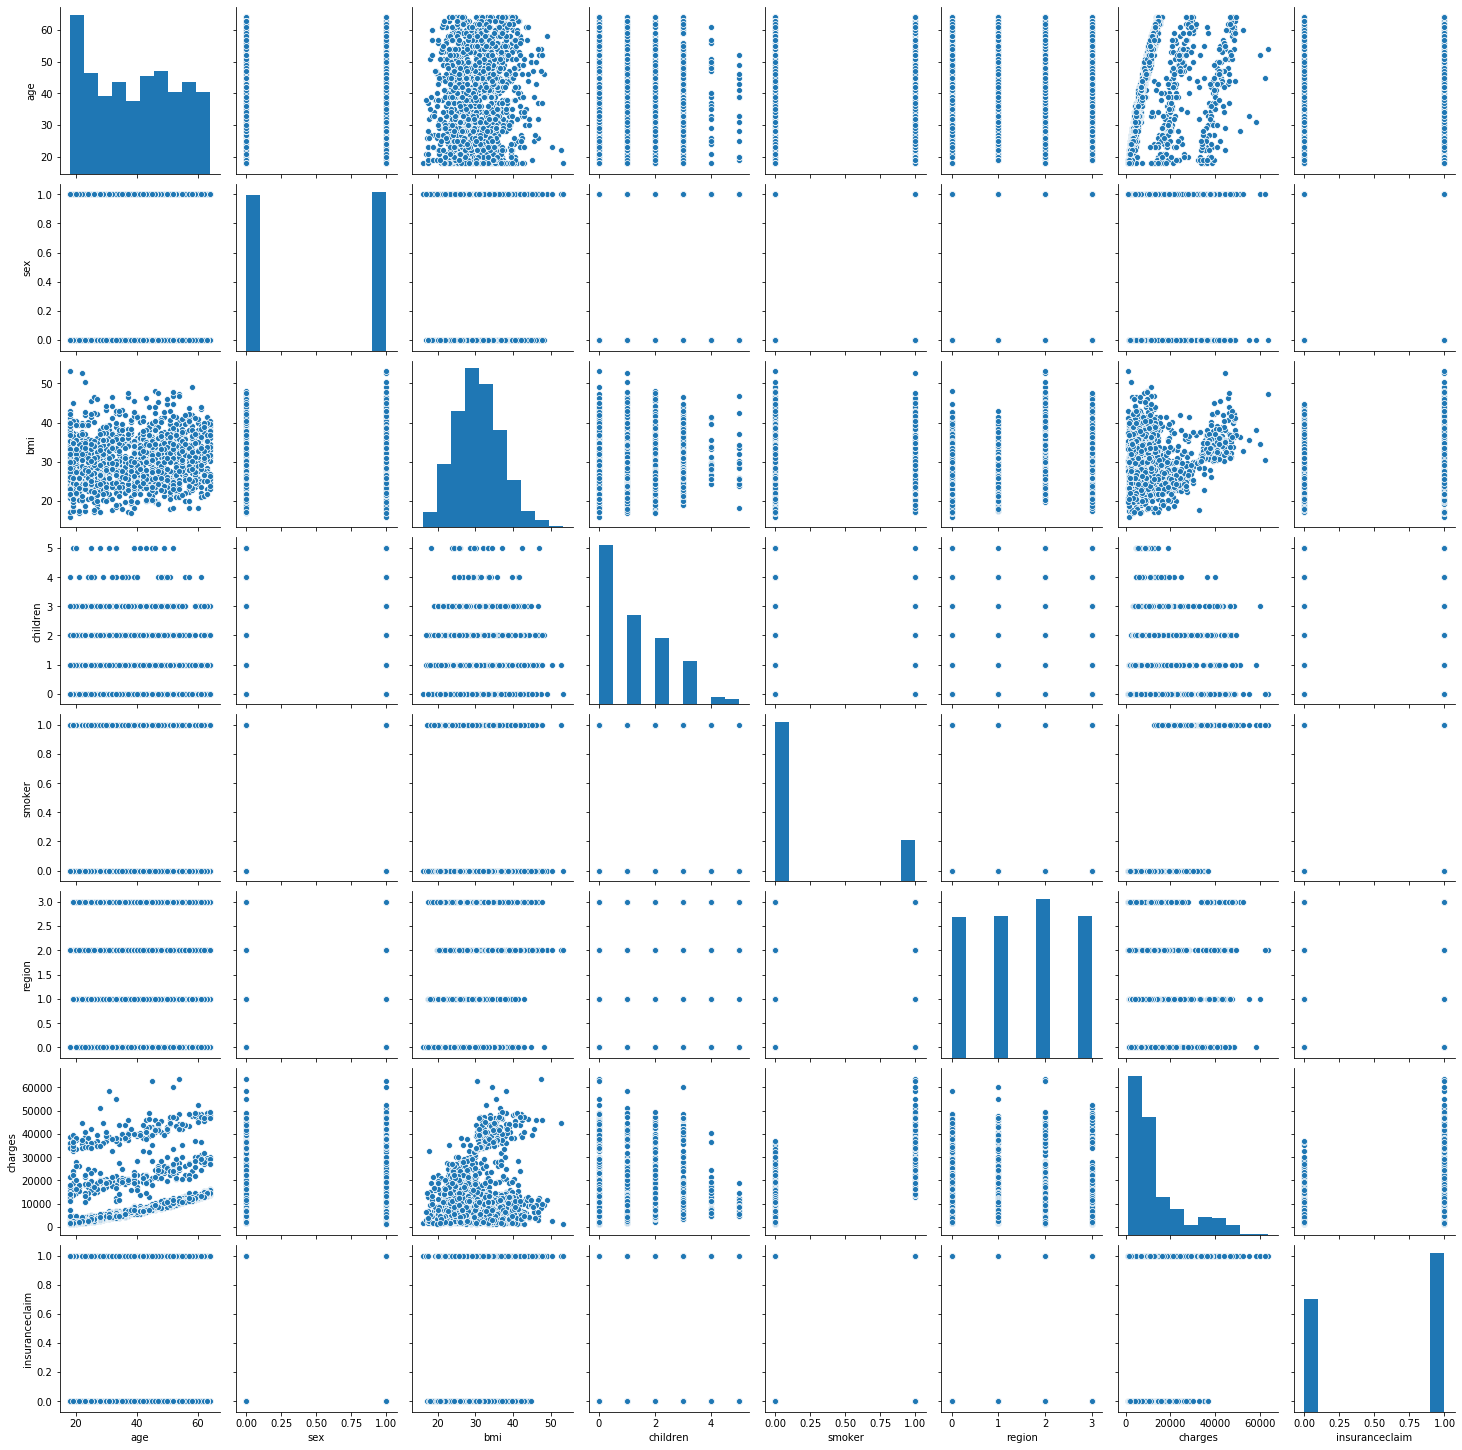

In [24]:
sns.pairplot(df)

# Cleaning the Dataset

In [21]:
z=np.abs(zscore(df))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.2985838 ,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 0.95368917,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.72867467,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 0.96159623,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 0.93036151,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.31105347,
        0.84190989]])

In [22]:
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [23]:
dfnew=df[(z<3).all(axis=1)]
dfnew
# new datset containing 'no outliers'
#this can be ysed to train the model

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# Data Preprocessing 

In [24]:
df1=dfnew.copy()
# talking a copy of the dataset

In [92]:
x=df1.iloc[:,0:-1]

In [93]:
y=df1.iloc[:,-1]

In [28]:
ss=StandardScaler()
x=ss.fit_transform(x)
# scaling the dataset in order to train the madel better

In [29]:
# Optimising the seed value(random state)
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum accuracy score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.905852417302799
accuracy score correspondng to random state 42 is: 0.8931297709923665
accuracy score correspondng to random state 43 is: 0.8804071246819338
accuracy score correspondng to random state 44 is: 0.905852417302799
accuracy score correspondng to random state 45 is: 0.8854961832061069
accuracy score correspondng to random state 46 is: 0.8829516539440203
accuracy score correspondng to random state 47 is: 0.8931297709923665
accuracy score correspondng to random state 48 is: 0.8829516539440203
accuracy score correspondng to random state 49 is: 0.8880407124681934
accuracy score correspondng to random state 50 is: 0.8804071246819338
accuracy score correspondng to random state 51 is: 0.8956743002544529
accuracy score correspondng to random state 52 is: 0.8753180661577609
accuracy score correspondng to random state 53 is: 0.8804071246819338
accuracy score correspondng to random state 54 is: 0.8676844783715013
accuracy score corresp

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84,test_size=0.3)

In [37]:
lg.fit(x_train,y_train)
# The target variable is binary output, so we will use logistic regression first to train the model.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.916030534351145
[[144  17]
 [ 16 216]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       161
           1       0.93      0.93      0.93       232

    accuracy                           0.92       393
   macro avg       0.91      0.91      0.91       393
weighted avg       0.92      0.92      0.92       393

[0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 

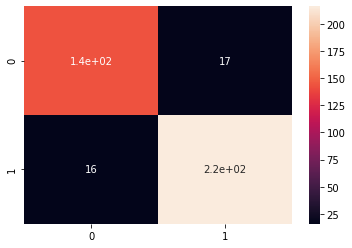

In [38]:
score=accuracy_score(y_test,pred)
matrix=confusion_matrix(y_test,pred)
report=classification_report(y_test,pred)
pred=lg.predict(x_test)
print(score)
print(matrix)
print(sns.heatmap(matrix,annot=True))
print(report)
print(pred)
print('\n')

In [ ]:
# The logistice regression is not giving good enough model score
# so we should cross validate that score using all the all the cloumns of the feature variables

In [39]:
cvs=cross_val_score(lg,x,y,cv=10,scoring='accuracy')
print(cvs)
print(cvs.mean())

[0.87022901 0.8778626  0.90076336 0.89312977 0.87022901 0.89312977
 0.88549618 0.92366412 0.87022901 0.84615385]
0.8830886670581328


In [ ]:
# the score is still not good enough

In [ ]:
# Lets try other Algorithms to optimise the score

In [40]:
model= [DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.9592875318066157


0.9592875318066157
[[144  17]
 [ 16 216]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       161
           1       0.97      0.97      0.97       232

    accuracy                           0.96       393
   macro avg       0.96      0.96      0.96       393
weighted avg       0.96      0.96      0.96       393



0.9808866705813271


AxesSubplot(0.125,0.125;0.62x0.755)



accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    

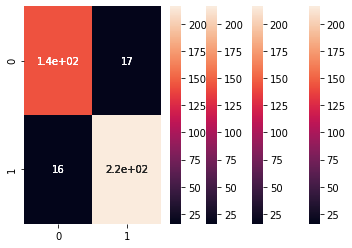

In [41]:
for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    Pred=i.predict(x_test)
    AS=accuracy_score(y_test,Pred)
    matrix=confusion_matrix(y_test,pred)
    cvs=cross_val_score(i,x,y,cv=10,scoring='accuracy').mean()
    print('accuracy score of',i,'is:',AS)
    print('\n')
    print(AS)
    print(matrix)
    print('\n')
    print(classification_report(y_test,Pred))
    print('\n')
    print(cvs)
    print('\n')
    print(sns.heatmap(matrix,annot=True))
    print('\n\n')

In [ ]:
#As we xan observe DecisionTree classifier is proving best accuracy score. So lets this alogorithn to optimse the Score

In [ ]:
# lets use GridsearchCV to optimise the hyperparameter of decisiontreeclassifier

In [94]:
dtc=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy','best','random']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.9877505827505828
{'criterion': 'entropy'}


In [ ]:
# so lets use 'entropy' as the hyperparameter to train the model 

In [95]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
predtc=dtc.predict(x_test)
print(accuracy_score(y_test,predtc))
print(classification_report(y_test,predtc))

0.9949109414758269
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       161
           1       1.00      1.00      1.00       232

    accuracy                           0.99       393
   macro avg       0.99      0.99      0.99       393
weighted avg       0.99      0.99      0.99       393



In [ ]:
# score accived 0.994 with the help of this model training

In [ ]:
#lets cross validate if score can be increased further

In [70]:
cvs=cross_val_score(dtc,x,y,cv=10)
print(cvs)
print(cvs.mean())
# the score is not satisfactory

[1.         1.         0.97709924 0.99236641 0.96183206 0.99236641
 0.99236641 0.98473282 0.97709924 0.99230769]
0.987017028772754


# AUC_ROC Curve using DecisionTreeClassifier

In [82]:
fpr,tpr,thresholds=roc_curve(y_test,predtc)

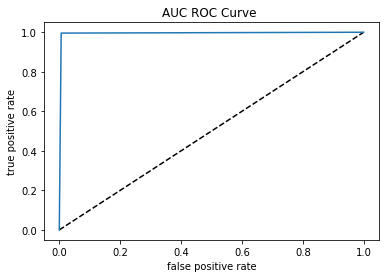

In [83]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve ')
plt.show()

In [85]:
auc_score=roc_auc_score(y_test,predtc)
print(auc_score)

0.9947392375240951


In [ ]:
auc_score achieved 0.9947

In [86]:
predtc
#preditcing the output

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
# lets try to boosting the model using ensemble technique

In [87]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
#score achived 1.0

1.0

In [ ]:
# Lets try to draw AUC_ROC curve and auc_score with the help of Randomforestclassifier

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,predrf)

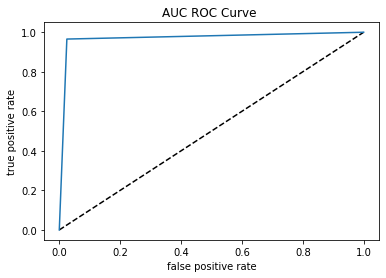

In [90]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve ')
plt.show()

In [91]:
auc_score=roc_auc_score(y_test,predrf)
print(auc_score)

0.970336260441208


In [ ]:
# score achoved is only 0.97

In [1]:
# So as we can observe DecisionTreeClassifier is providing maximum accuracy score (0.994) & auc_score(0.994)
# So let's save the model with this algorithm 

# Saving the Model 

In [74]:
joblib.dump(rf,'dtcsbi.obj')

['dtcsbi.obj']